In [1]:
from pystencils.session import *

# Demo: Working with derivatives


## Overview
This notebook demonstrates how to formulate continuous differential operators in *pystencils* and automatically derive finite difference stencils from them.

Instead of using the built-in derivatives in *sympy*, *pystencils* comes with its own derivative objects. They represent spatial derivatives of pystencils fields.

In [2]:
f = ps.fields("f: [2D]")
first_derivative_x = ps.fd.diff(f, 0)
first_derivative_x

This object is the derivative of the field $f$ with respect to the first spatial coordinate $x$. To get a finite difference approximation a discretization strategy is required:

!


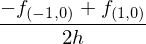

In [3]:
discretize_2nd_order = ps.fd.Discretization2ndOrder(dx=sp.symbols("h"))
discretize_2nd_order(first_derivative_x)

Strictly speaking, derivative objects act on *field accesses*, not *fields*, that why there is a $(0,0)$ index at the field:

In [4]:
first_derivative_x

Sometimes it might be useful to specify derivatives at an offset e.g.

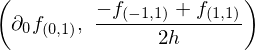

In [5]:
derivative_offset = ps.fd.diff(f[0, 1], 0)
derivative_offset, discretize_2nd_order(derivative_offset)

Another example with second order derivatives:

In [6]:
laplacian = ps.fd.diff(f, 0, 0) + ps.fd.diff(f, 1, 1)
laplacian

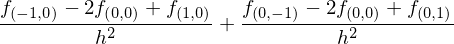

In [7]:
discretize_2nd_order(laplacian)

## Working with derivative terms

No automatic simplifications are done on derivative terms i.e. linearity relations or product rule are not applied automatically.

In [8]:
f, g = ps.fields("f, g :[2D]")
c = sp.symbols("c")
δ = ps.fd.diff

expr = δ( δ(f, 0) +  δ(g, 0) + c + 5 , 0)
expr

This nested term can not be discretized automatically. 

In [9]:
try:
    discretize_2nd_order(expr)
except ValueError as e:
    print(e)

Only derivatives with field or field accesses as arguments can be discretized


### Linearity
The following function expands all derivatives exploiting linearity:

In [10]:
ps.fd.expand_diff_linear(expr)

The symbol $c$ that was included is interpreted as a function by default. 
We can control the simplification behaviour by specifying all functions or all constants:

In [11]:
ps.fd.expand_diff_linear(expr, functions=(f[0,0], g[0, 0]))

In [12]:
ps.fd.expand_diff_linear(expr, constants=[c])

The expanded term can then be discretized:

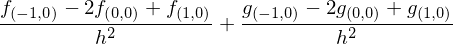

In [13]:
discretize_2nd_order(ps.fd.expand_diff_linear(expr, constants=[c]))

### Product rule

The next cells show how to apply product rule and its reverse:

In [14]:
expr = δ(f[0, 0] * g[0, 0], 0 )
expr

In [15]:
expanded_expr = ps.fd.expand_diff_products(expr)
expanded_expr

In [16]:
recombined_expr = ps.fd.combine_diff_products(expanded_expr)
recombined_expr

In [17]:
assert recombined_expr == expr

### Evaluate derivatives

Arguments of derivative need not be to be fields, only when trying to discretize them. 
The next cells show how to transform them to *sympy* derivatives and evaluate them.

In [29]:
k = sp.symbols("k")
expr = δ(k**3 + 2 * k, 0 )
expr

In [31]:
ps.fd.evaluate_diffs(expr, var=k)